# math1

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
# menentukan rataan 2 kelompok
# grup 1 = tanpa pupuk
# grup 2 = dengan pupuk
rataan1 = 50
rataan2 = 65

# Menentukan standar deviasi (variasi) -- sama untuk 2 kelompok
sd = 5

# ukuran sampel dua kelompok
sampel1 = 50
sampel2 = 40

In [3]:
# Generate bilangan random
test = np.random.randn(sampel1)
test

array([ 0.86147806,  0.08258459, -0.30243098,  0.07412349, -1.52929172,
        0.16091337, -0.09949262, -0.50116449, -1.2452959 ,  0.37226528,
       -0.53631774,  0.17604107,  1.3250326 ,  0.74450051, -0.33197256,
       -0.14993854, -0.20088465, -0.33782775, -1.24971405,  1.408939  ,
        0.47840031, -1.86296683, -0.07516265,  0.38028171, -1.65497024,
       -0.44189471, -0.11474138, -0.48716777, -0.06350388,  0.65428943,
        1.44167046,  2.09836248,  0.52491606, -0.12292983,  0.16041731,
        0.42355945,  0.21826308,  0.8754316 ,  0.27855557,  0.66049949,
       -2.038858  ,  0.78374677, -0.39984727,  0.98875601,  1.30638502,
       -0.30133809, -1.22960273,  0.73643809, -0.17869541, -0.33965768])

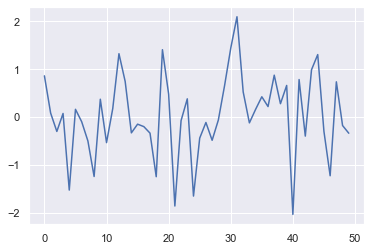

In [4]:
plt.plot(test)

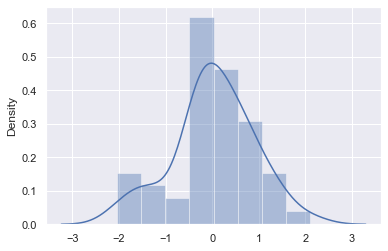

In [5]:
# untuk mengecek apakah data kita adalah distribusi normal/normal distribution
sns.distplot(test);

In [6]:
# Generate data
data1 = np.random.randn(sampel1)*sd + rataan1
data2 = np.random.randn(sampel2)*sd + rataan2

# Menggabungkan samle size (jumlah data)
kelompok_data = [sampel1,sampel2]

# method hstack adalah membuat data rata kanan atau horizontal
batas = [np.min(np.hstack((data1,data2))), np.max(np.hstack((data1,data2)))]

In [7]:
batas

[42.17506816953509, 73.58636053957144]

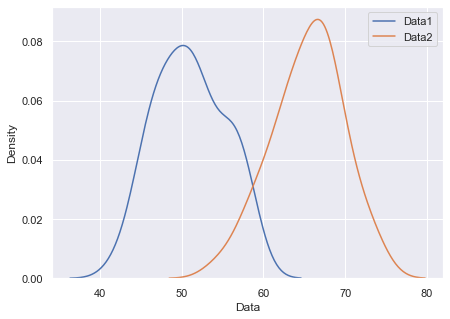

In [8]:
# plot distribusi kedua kelompok (statistik deskriptif)
plt.figure(figsize=(7,5))

a = sns.distplot(data1, label='Data1', hist=False)
a = sns.distplot(data2, label='Data2', hist=False)

a.set(xlabel='Data', ylabel='Density')
plt.legend();

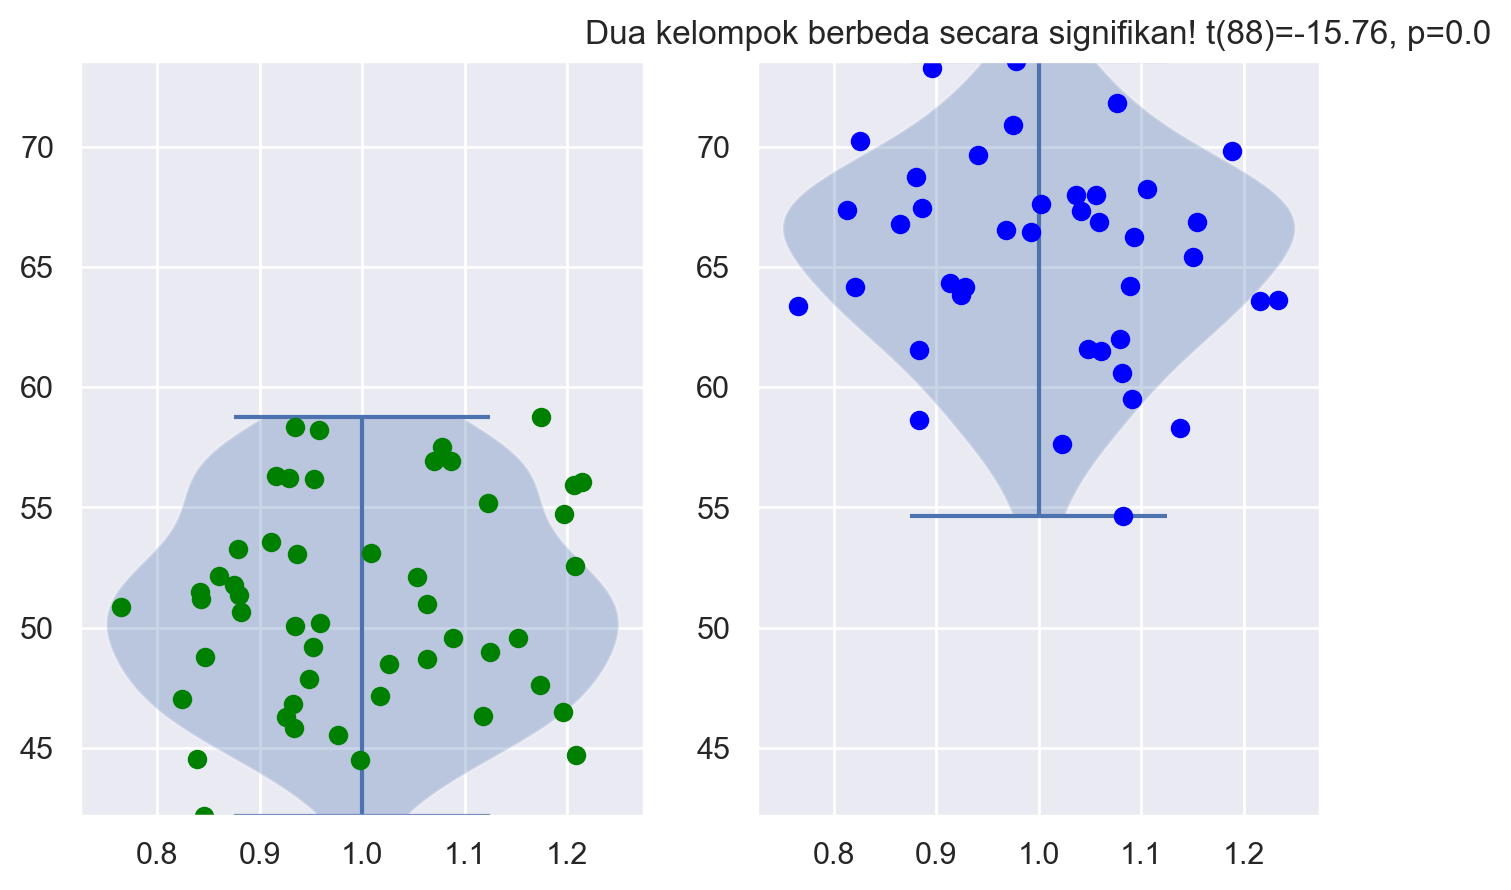

In [9]:
# melakukan uji statistik (statistik infrential)
fig, ax = plt.subplots(1,2, figsize=(8,5), dpi=200)

ax[0].violinplot(data1)
ax[0].plot(1+np.random.randn(sampel1)/10, data1, 'o', color='green')
ax[0].set_ylim(batas)

ax[1].violinplot(data2)
ax[1].plot(1+np.random.randn(sampel2)/10, data2, 'o', color='blue')
ax[1].set_ylim(batas)

# melakukan uji t-test
# aturan umum : jika nilai t-test > 2 atau t-test < -2 maka biasanya signifikan
t,p = stats.ttest_ind(data1, data2)

# mencetak hasil t-test dijudul
sigtxt = ('', 'TIDAK')
plt.title('Dua kelompok{} berbeda secara signifikan! t({})={}, p={}'.format(sigtxt[int(p>.05)], sum(kelompok_data)-2, 
                                                                           np.round(t,2),
                                                                           np.round(p,6)));

# conclusion : kita dapat menyimpulkan bahwa pemberian pupuk pada grup 2 berdampak signifikan dibanding grup 1 tanpa pupuk